In [220]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import h5py
import os

plt.rcParams['figure.dpi'] = 200

In [221]:
with h5py.File(os.path.join('..', '..', 'data', 'subthreshold_relaxation_experiment_auto_2.h5'), 'r') as f:
    regs = f["regs"][()]
    ths = f["ths"][()]
    ratios = f["ratios"][()]
    errs = f["es_dec"][()]
    errs_cur = f["es_cur"][()]
#    e0s = f["e0s"][()]
#    e0s_cur = f["e0s_cur"][()]
#    err_regs = f["err_regs"][()]
    sigmas = f["sigmas"][()]

In [222]:
errs.shape

(3, 7, 4, 11, 100, 9)

In [223]:
ths, ratios, sigmas

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([0.25, 0.5 , 0.75, 1.  ]),
 array([0.001     , 0.00199526, 0.00398107, 0.00794328, 0.01584893,
        0.03162278, 0.06309573, 0.12589254, 0.25118864, 0.50118723,
        1.        ]))

In [224]:
iThStyles = ['--', ':'] + ["-"] * len(ths)

In [245]:
errs_rel = (1.0 - (errs / errs[:, 0][:, None])) * 100
errs_cur_rel = (1.0 - (errs_cur / errs_cur[:, 0][:, None])) * 100

In [246]:
errs_rel.shape

(3, 7, 4, 11, 100, 9)

In [232]:
errs_rel = (1.0 - (errs / errs[:, 0][:, None]).reshape(3, 7, -1)) * 100
errs_cur_rel = (1.0 - (errs_cur / errs_cur[:, 0][:, None]).reshape(3, 7, -1)) * 100

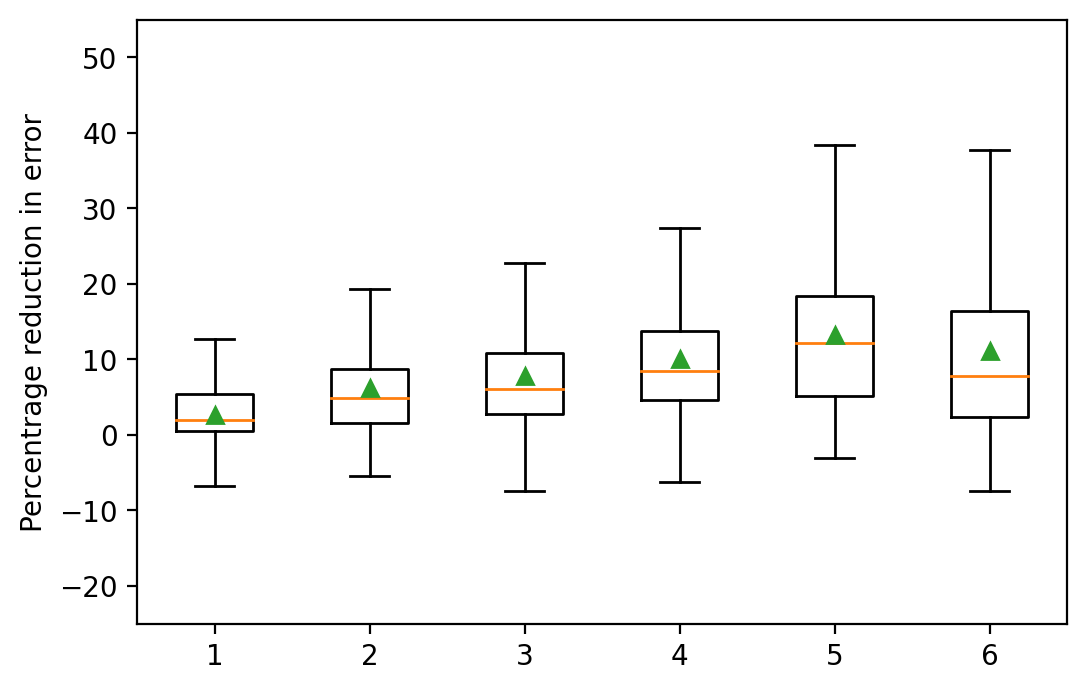

In [238]:
fig, ax = plt.subplots()
ax.boxplot(errs_rel[2, 1:].T, showmeans=True, showfliers=False);
ax.set_ylabel('Percentrage reduction in error')
ax.set_ylim(-25, 55)
ax.set_yticks(np.arange(-20, 51, 10))

(-25.0, 100.0)

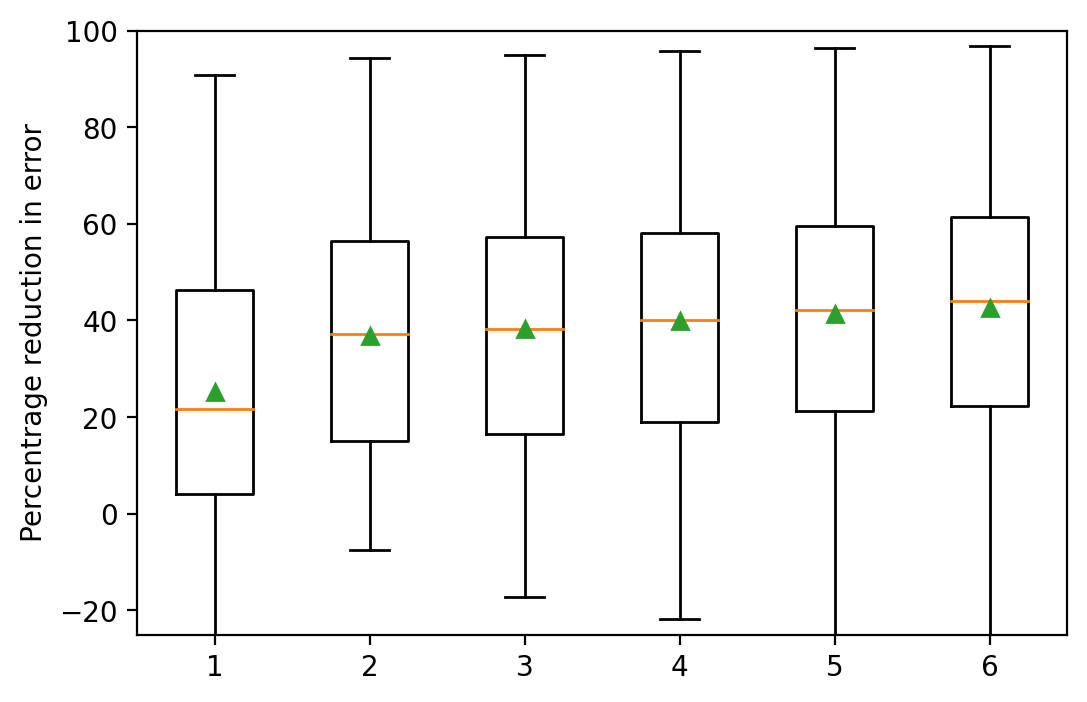

In [243]:
fig, ax = plt.subplots()
ax.boxplot(errs_cur_rel[0, 1:].T, showmeans=True, showfliers=False);
ax.set_ylabel('Percentrage reduction in error')
ax.set_ylim(-25, 100)
#ax.set_yticks(np.arange(-25, 101, 25))

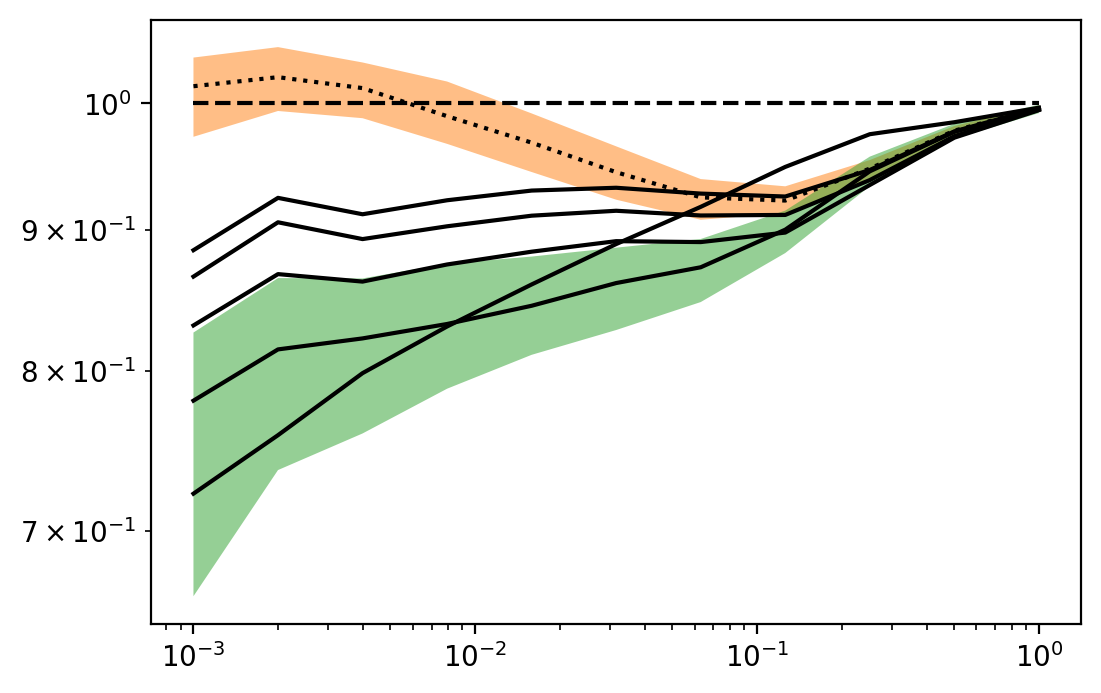

In [143]:
i_fun = 2
i_ratio = 1
fig, ax = plt.subplots()
for i_th in [0, 1, 2, 3, 4, 5, 6]:
        data = errs_rel[i_fun, i_th, i_ratio] 
        data = data.reshape(len(sigmas), -1)
        ax.loglog(sigmas, np.median(data, axis=-1), color='k', linestyle=iThStyles[i_th])
        if i_th in {0, 1, 5}:
            ax.fill_between(sigmas,
                            np.percentile(data, 25, axis=-1),
                            np.percentile(data, 75, axis=-1),
                            alpha=0.5,
                            linewidth=0)
#ax.set_ylim(1e-3, 1)
#ax.plot([1e-3, 1], [1e-3, 1], 'k:')

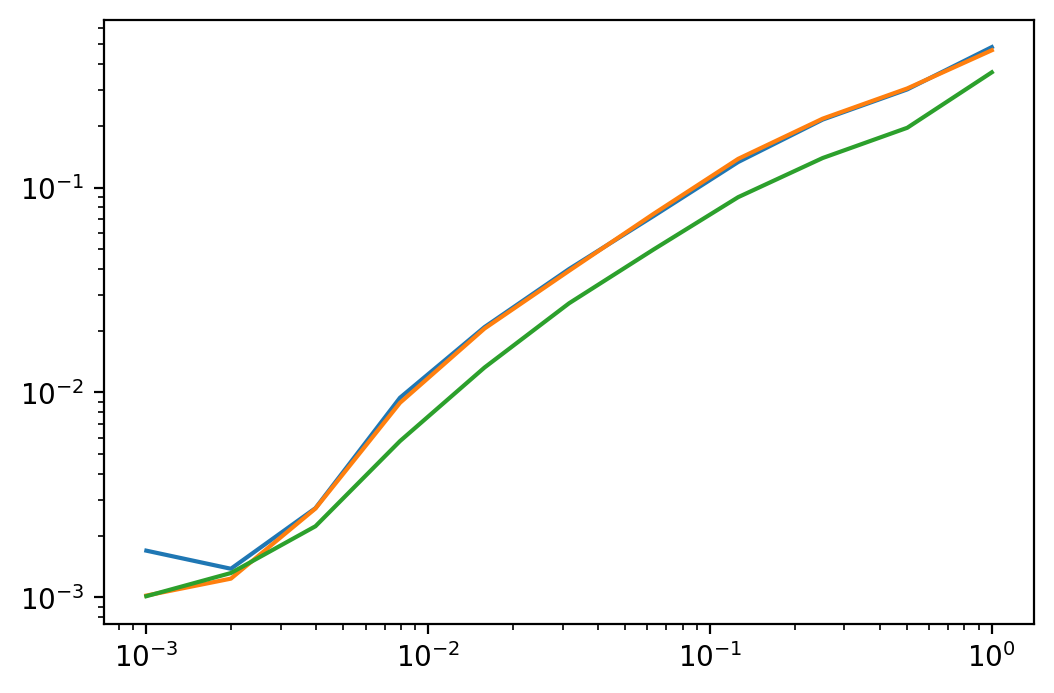

In [124]:
fig, ax = plt.subplots()
for i_th in [0, 1, 5]:
    ax.loglog(sigmas, np.power(10, regs[0, i_th, 3, :]))

In [97]:
regs.shape

(3, 7, 4, 11)